* Name: Nam (Nam) Pham
* Email: nam.pham@edu.turkuamk.fi

The agenda of the work will be:
* Descriptive Analytics
* Diagnostic
* Predictive

In [1]:
# basic libraries to load the data

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Desriptive Analytics

In [2]:
data = pd.read_csv('challenge_data.csv')
data.head(n=5)

,index,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0,0.693931,0.634769,-0.751780,-1.586810,0.421293,0.599140,-0.180750,0.059869,0.975170,0.680625,-123.717679
1,1,-0.503215,0.973448,0.123033,1.344061,1.094889,0.506495,-0.680246,0.119860,0.391153,1.371086,266.033379
2,2,0.071483,0.098679,-0.004386,-1.586163,-0.643910,-0.669362,2.021002,-0.681658,-2.124477,0.160637,-179.081079
3,3,-0.164016,-0.900369,-0.043065,-0.514386,0.302797,1.566014,0.563370,-0.058207,1.022308,0.672829,7.546750
4,4,-1.689354,-2.055297,-1.465223,0.882966,-0.195914,-1.350270,0.047570,-0.948739,-0.631810,-1.357097,-177.720899



Notice there are double "index" columns. Additionally, "index" is meaningless when it comes to performing prediction. Therefore, dropping ["index"] column is neccessary. 

In [3]:
df = data.drop(columns = ['index'])
df.head(n=5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.693931,0.634769,-0.751780,-1.586810,0.421293,0.599140,-0.180750,0.059869,0.975170,0.680625,-123.717679
1,-0.503215,0.973448,0.123033,1.344061,1.094889,0.506495,-0.680246,0.119860,0.391153,1.371086,266.033379
2,0.071483,0.098679,-0.004386,-1.586163,-0.643910,-0.669362,2.021002,-0.681658,-2.124477,0.160637,-179.081079
3,-0.164016,-0.900369,-0.043065,-0.514386,0.302797,1.566014,0.563370,-0.058207,1.022308,0.672829,7.546750
4,-1.689354,-2.055297,-1.465223,0.882966,-0.195914,-1.350270,0.047570,-0.948739,-0.631810,-1.357097,-177.720899


The shape (size) of the dataset and type of each variable should be oversed in case there is errors to be imputed.

In [4]:
df.shape

(1000, 11)

In [5]:
df.dtypes

feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
target        float64
dtype: object



The next step is to check whether there is any missing values. In case of positiveness, imputation must be taken into consideration. 
Regarding imputation, which method to be applied depends greatly on the characteristic of the dataset and the prediction to be used.

In [6]:
#check missing values
df.isnull().any()

feature_1     False
feature_2     False
feature_3     False
feature_4     False
feature_5     False
feature_6     False
feature_7     False
feature_8     False
feature_9     False
feature_10    False
target        False
dtype: bool


Fortunately enough, the dataset appears to be well clean. 

Next is to have a look at the dataset's basic description:

In [7]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.033210,0.028159,0.052668,0.034480,0.007797,0.012802,0.067505,0.024692,-0.011099,-0.022531,8.272938
std,0.974980,1.003784,0.963616,1.054445,1.003179,1.012354,0.976790,0.993160,0.988103,0.978680,154.604419
min,-3.150762,-3.016387,-2.682694,-3.599400,-3.233505,-3.434819,-2.993803,-3.880898,-3.331437,-3.563517,-522.167758
25%,-0.686490,-0.673125,-0.589876,-0.688696,-0.667917,-0.655868,-0.574366,-0.592337,-0.666482,-0.681839,-94.451048
50%,-0.020796,0.036641,0.017721,0.001742,0.020780,0.037120,0.061429,0.049446,-0.024036,-0.013996,7.745787
75%,0.567834,0.681409,0.730506,0.786382,0.691283,0.651184,0.753553,0.677113,0.663962,0.656778,118.429566
max,3.220568,3.125635,3.001147,3.287788,3.037643,2.928006,2.642923,2.828678,2.912810,2.833683,509.852251



Basic information can be withdrawn from the table is:
* The number of inputs: 1000 x 11 (rows x columns)
* Mean value of each column.
* Min-Max  range value of each column.
* Standard deviation
* Important percentiles: 25 - 50 - 75

Generally, feature_1 to feature_10, their values fall in range (-3., +3.). "Target", exceptionally, its value stands out from the rest and runs from -522. to +509.

Question arises: should the dataset be standardised? The solution of 02 cases will be provided for a better understanding. 

First, it is important to check the distribution and correlation between every pair of variables.

In [8]:
#For basic statistical visualization, SEABORN is a useful, powerful library to work with.
import seaborn as sn

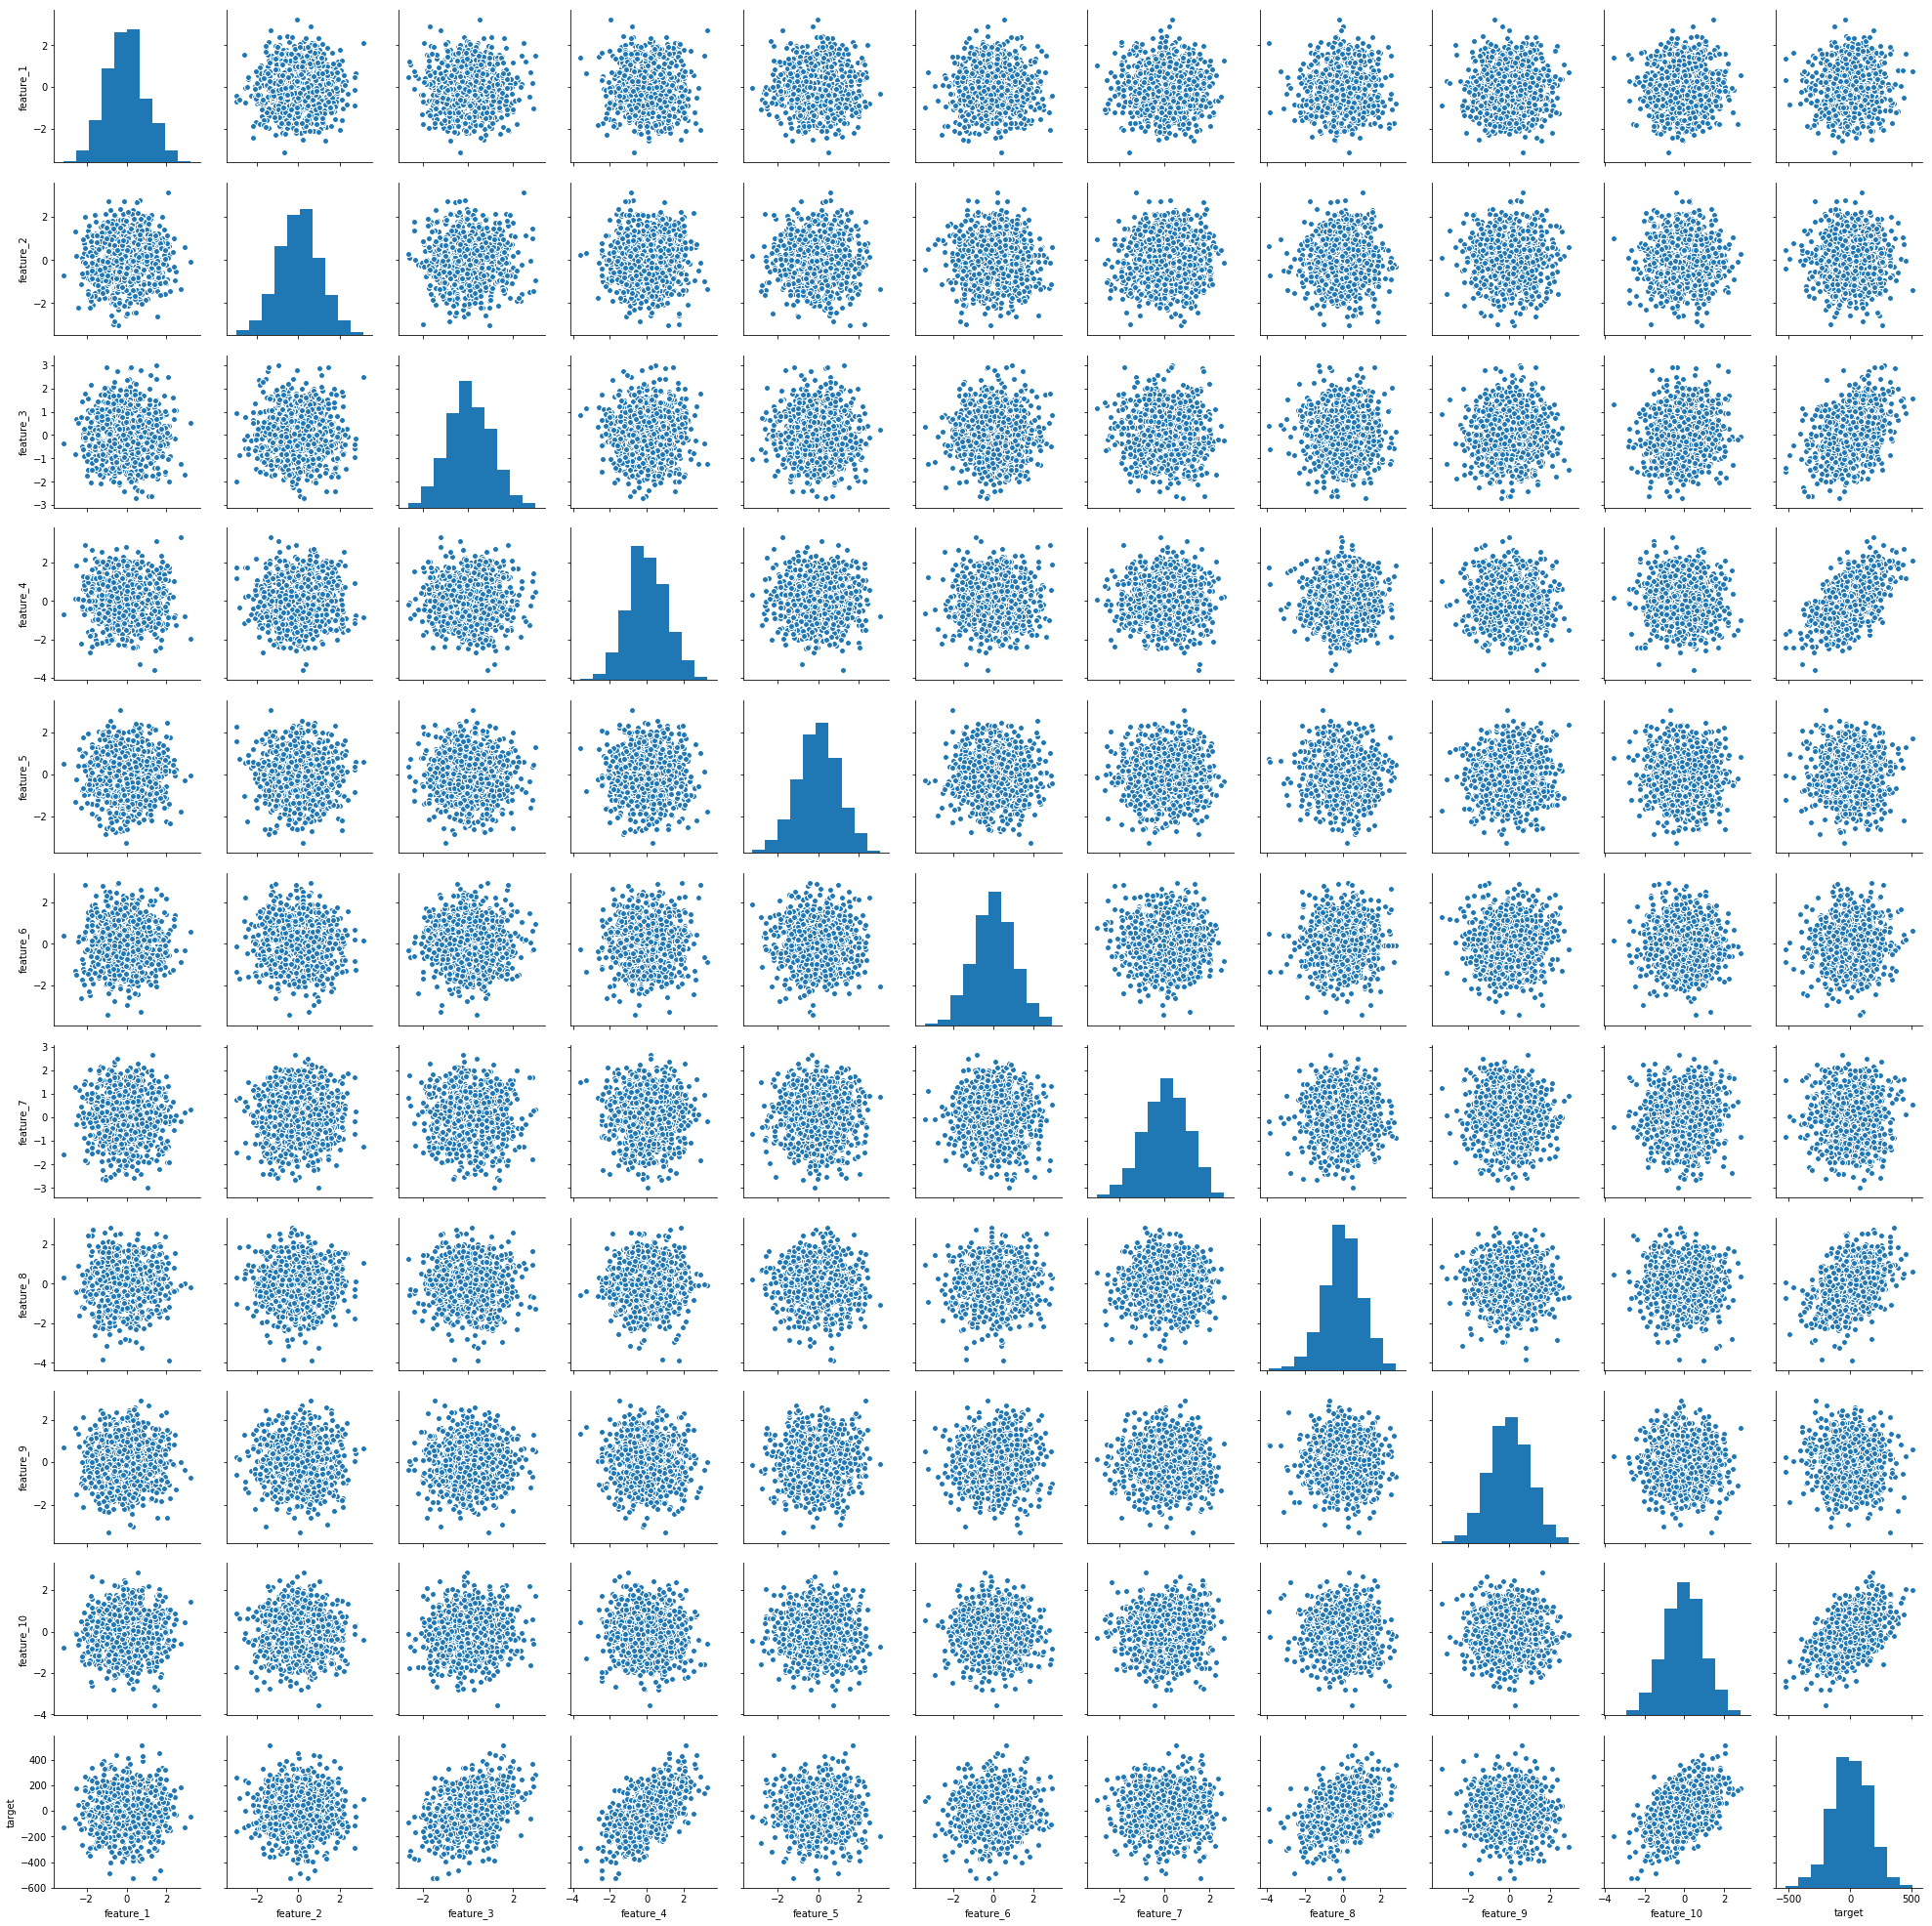

In [9]:
sn.pairplot(df);

The histogram on the diagnoal axis visualize the distribution of corresponding variable. The rest is the scatter plot between two variables. All the scatter plots indicate that the relationship between every two variable is spread evenly. Furthermore, none of the plot is skewed, which is a good new. 

From the left triangle, all the features are quite normally distributed. However, there are visibly outliers in every plot. Therefore, scaling the dataset is required to avoid loss of information while learning.

Regarding the "target" variable, the linearity is obvious in pair between itself with feature 3, 4, 8, and 10. For a better degre of confidence, it is good to look at the correlation of all the variables from the dataset.


*Note: Even though, particularly in this case, the result yielded from the model is quite identical, small differences still exists. As a result, preprocessing (standardising) should be applied automatically to avoid unnecessary bias.*


In [10]:
df.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
feature_1,1.000000,0.050620,-0.005833,0.009611,0.020882,0.039851,-0.008984,0.007702,0.045640,0.019147,0.018308
feature_2,0.050620,1.000000,-0.014319,0.032939,-0.032959,-0.051140,0.045024,0.007214,-0.032612,-0.013711,0.011803
feature_3,-0.005833,-0.014319,1.000000,0.006601,-0.028918,0.008003,-0.026492,-0.024738,0.028563,0.082621,0.378148
feature_4,0.009611,0.032939,0.006601,1.000000,0.009751,0.041251,-0.002508,0.000839,-0.014849,-0.045525,0.621528
feature_5,0.020882,-0.032959,-0.028918,0.009751,1.000000,-0.002105,0.022578,0.000509,0.027691,-0.020498,-0.014797
feature_6,0.039851,-0.051140,0.008003,0.041251,-0.002105,1.000000,0.007571,0.066752,0.024439,0.007059,0.062041
feature_7,-0.008984,0.045024,-0.026492,-0.002508,0.022578,0.007571,1.000000,0.021232,-0.018435,0.046830,0.024922
feature_8,0.007702,0.007214,-0.024738,0.000839,0.000509,0.066752,0.021232,1.000000,-0.005197,-0.054330,0.392789
feature_9,0.045640,-0.032612,0.028563,-0.014849,0.027691,0.024439,-0.018435,-0.005197,1.000000,-0.012041,-0.008920
feature_10,0.019147,-0.013711,0.082621,-0.045525,-0.020498,0.007059,0.046830,-0.054330,-0.012041,1.000000,0.537447


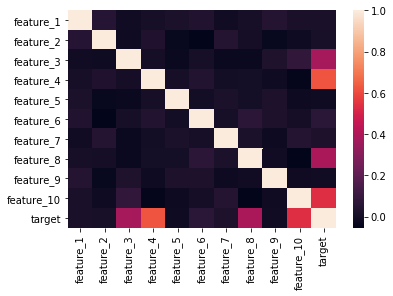

In [11]:
sn.heatmap(df.corr());


It is easier to frame the value and compress them into the heatmap instead of interpreting the correlation by numbers.

As stated, the linearity of the "target" variable is stronger when it is paired with feature_3, 4, 8 and 10. 

## Predictive with Linear Regression

### Without scaling

The first step is to define and assign which data is used for training, testing.

In [12]:
X = df.iloc[:, :-1] # Take up to the feature_10
y = df.iloc[:, -1] # predict value, "target" variable

The rule to golden proportion when splitting the dataset into the training and testing is: 70 - 30 or 80 - 20 respectively. 

The ratio applied here is 80-20

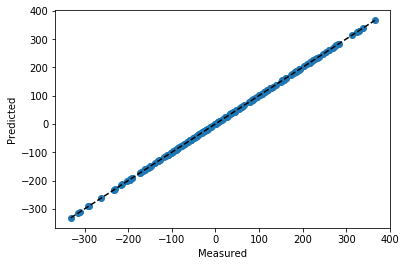

In [13]:
from sklearn.model_selection import train_test_split

# portion: 8-2 => training - testing
# declare randome_state to preserve the result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102) 



# Perform machine learning
from sklearn.linear_model import LinearRegression


linear = LinearRegression()
linear.fit(X_train,y_train)

y_pred = linear.predict(X_test)
#plt.scatter(y_test,y_pred);


# Plot the result
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

The result is pretty clear and linear, which means loss of information (wrong prediction) is minimal and almost close to zero.
The relationship between the variables and the target is direct: the increase in features will lead to the increase in target. 

However, as a final step, accuracy must be taken into account to double check whether there is any wrong assumptions have been made. The method to be used here is to find the Root Mean Squared Error (RMSE) - calculating the standard deviation of residuals.

*Residuals: how far a datapoint from the regression line.*

*RMSE: How spread those residuals are, or how fit the model is*

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.011316399603580218

The ideal of the RMSE is 0. Hence, comparing with the value obtained (0.01131), loss of information may occur during the training process (?) Before jumping to conclusion, let's consider the other case when data are scaled.


### Scaled Data

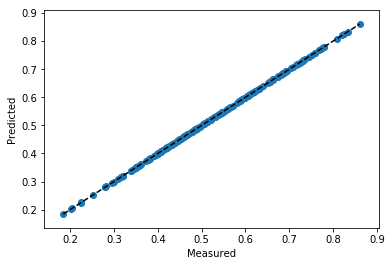

In [15]:
from sklearn import preprocessing


data = df.values

# scaling data
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

# define what to predict
X = data_scaled[:, :-1]
y = data_scaled[:, -1]

# split train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102) 

# fitting data
linear.fit(X_train,y_train)

# prediction and plotting
y_pred = linear.predict(X_test)

# Plot the result
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [16]:
print("%.10f" % mean_squared_error(y_test, y_pred))

0.0000000106


Comparing the result with the previous case (0.0000 vs 0.01131), information loss obviously happened. Even though, particularly in this case, the result may not differ that much since the dataset is almost ideal, it is of importance to scale the data to reduce false prediction. 

In other words: The better fit the prediction model is, the less monetary loss can we avoid. 

## Linear Regression with Keras

In [17]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 


Using TensorFlow backend.


There are 02 steps in this method:
* Scaling dataset (as above)
* Create a regressor 

In [18]:
# scaling data

data = df.values

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

# define what to predict
X = data_scaled[:, :-1]
y = data_scaled[:, -1]


# from sklearn.model_selection import train_test_split
# define train-test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102) 

In [19]:
# build a regressor model for KerasRegressor 
# with 2 hidden layers

def build_regressor():
    
    model = Sequential()
    
    # 2 hidden layers are used
    model.add(Dense(15, input_dim=10,))
    model.add(Dense(8, activation='linear'))
    # final out put
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'accuracy'])
    
    return model



from keras.wrappers.scikit_learn import KerasRegressor

regressor = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100, verbose=0)


regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

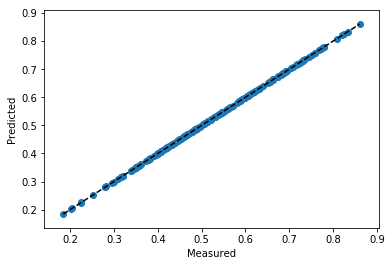

In [20]:
# Plot the result

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Check whether the training model has been overfit or underfit:

In [21]:
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

print("Prediction with Train Set :\t{:0.5f}".format(mean_squared_error(y_train, y_train_pred)))
print("Prediction with Test Set:\t{:0.5f}".format(mean_squared_error(y_test, y_test_pred)))

Prediction with Train Set :	0.00000
Prediction with Test Set:	0.00000


RMSE of both cases are 0, which is the ideal number that is looked for. This tells a very strong direct relationship between the targeted variable and the rest (same result as the previous method). 

Another indicator to check the over-/underfitting of the model, in this case, is $R^2$ score (0-1). This indicates the correlation between 02 random variables. 

In [22]:
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

from sklearn.metrics import r2_score

print("Prediction with Train Set:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("Prediction with Test Set:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

Prediction with Train Set:	1.000
Prediction with Test Set:	1.000


No Overfitting or Underfitting occur. The Score in both cases are 1.0, which shows the strong direct relationship of the model as stated above.